In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import os

In [8]:
path = '/Users/everettclark/Desktop/codeup-data-science/time-series-exercises/archive/'

## Planning:
    - Peer through datasets
    - Research about climate change
    - Pick a location to examine
    - Find data associated with that location and potentially merge .csv
    - Create separate files 
    - Explore
    - Model
    - Report Findings

### I've decided to look at Haiti. It is close to the U.S. and by limited research is more susceptible to drastic events brought on by changes in climate.

In 2019, former Prime Minister Joseph Jouthe compared the climate crisis to violence in his country at COP25: “Climate change is a very big terror in Haiti. It’s very hard for us to deal with climate change.” An ongoing humanitarian crisis in Haiti, along with its high levels of poverty, is partly to blame. The World Bank estimates that Haiti has lost 98% of its forests, making the country even more vulnerable to complex emergencies when they strike. 

Many countries in the Caribbean sit in the hurricane belt and suffer the effects of global warming — including the Dominican Republic, which shares the island of Hispaniola with Haiti. However, many of these countries also have better systems for response and resilience in place. Over 96% of Haitians are at risk when a disaster strikes, and the damages sustained in the wake of these emergencies carry a heavy financial burden. The World Bank also estimates that 2016’s Hurricane Matthew caused damages equal to nearly one-third of the country’s GDP. The 2010 earthquake that killed approximately 250,000 people cost 120% of the country’s GDP. 

In [52]:
st = pd.read_csv(f'{path}/GlobalLandTemperaturesByState.csv')
st.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil


In [29]:
st[st.Country == 'Haiti']

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country


#### Haiti is not found in the Temps by State .csv

In [51]:
co = pd.read_csv(f'{path}GlobalLandTemperaturesByCountry.csv')
co.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


In [36]:
co[co.Country == 'Haiti']

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
229802,1824-01-01,24.987,0.908,Haiti
229803,1824-02-01,23.994,1.953,Haiti
229804,1824-03-01,25.808,2.162,Haiti
229805,1824-04-01,25.650,2.092,Haiti
229806,1824-05-01,26.703,1.487,Haiti
...,...,...,...,...
232074,2013-05-01,27.425,0.279,Haiti
232075,2013-06-01,28.147,0.568,Haiti
232076,2013-07-01,28.226,1.326,Haiti
232077,2013-08-01,28.525,0.861,Haiti


#### 2,277 Rows in the Country .csv

---

In [50]:
mc = pd.read_csv(f'{path}/GlobalLandTemperaturesByMajorCity.csv')
mc.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [32]:
mc[mc.Country =='Haiti']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


#### Nothing in the .csv for Major Cities

---

In [49]:
ci = pd.read_csv(f'{path}/GlobalLandTemperaturesByCity.csv')
ci.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [25]:
ci[ci.Country =='Haiti']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1349015,1823-01-01,23.463,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1349016,1823-02-01,22.068,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1349017,1823-03-01,23.882,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1349018,1823-04-01,24.043,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1349019,1823-05-01,25.918,1.391,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...,...
5970698,2013-05-01,27.596,0.309,Port Au Prince,Haiti,18.48N,72.68W
5970699,2013-06-01,28.240,0.587,Port Au Prince,Haiti,18.48N,72.68W
5970700,2013-07-01,28.297,1.444,Port Au Prince,Haiti,18.48N,72.68W
5970701,2013-08-01,28.496,0.960,Port Au Prince,Haiti,18.48N,72.68W


#### 11,397 rows in the City .csv

In [48]:
globe = pd.read_csv(f'{path}/GlobalTemperatures.csv')
globe.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
globe.shape

(3192, 9)

In [38]:
globe.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [40]:
globe.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


---

In [55]:
haiti = ci[ci.Country =='Haiti']
haiti

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1349015,1823-01-01,23.463,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1349016,1823-02-01,22.068,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1349017,1823-03-01,23.882,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1349018,1823-04-01,24.043,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1349019,1823-05-01,25.918,1.391,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...,...
5970698,2013-05-01,27.596,0.309,Port Au Prince,Haiti,18.48N,72.68W
5970699,2013-06-01,28.240,0.587,Port Au Prince,Haiti,18.48N,72.68W
5970700,2013-07-01,28.297,1.444,Port Au Prince,Haiti,18.48N,72.68W
5970701,2013-08-01,28.496,0.960,Port Au Prince,Haiti,18.48N,72.68W


In [57]:
haiti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11397 entries, 1349015 to 5970702
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             11397 non-null  object 
 1   AverageTemperature             11178 non-null  float64
 2   AverageTemperatureUncertainty  11178 non-null  float64
 3   City                           11397 non-null  object 
 4   Country                        11397 non-null  object 
 5   Latitude                       11397 non-null  object 
 6   Longitude                      11397 non-null  object 
dtypes: float64(2), object(5)
memory usage: 712.3+ KB


In [69]:
haiti.dt = pd.to_datetime(haiti.dt, format='%Y-%m-%d ')

In [70]:
haiti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11397 entries, 1349015 to 5970702
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             11397 non-null  datetime64[ns]
 1   AverageTemperature             11178 non-null  float64       
 2   AverageTemperatureUncertainty  11178 non-null  float64       
 3   City                           11397 non-null  object        
 4   Country                        11397 non-null  object        
 5   Latitude                       11397 non-null  object        
 6   Longitude                      11397 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 712.3+ KB


In [77]:
haiti.rename(columns={'dt': 'date', 
                      'AverageTemperature': 'avg_temp', 
                      'AverageTemperatureUncertainty': 'temp_vari', 
                      'Country': 'country', 
                      'City': 'city', 
                      'Latitude': 'lat', 
                      'Longitude': 'long'}, 
             inplace=True)
haiti

,date,avg_temp,temp_vari,city,country,lat,long
1349015,1823-01-01,23.463,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1349016,1823-02-01,22.068,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1349017,1823-03-01,23.882,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1349018,1823-04-01,24.043,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1349019,1823-05-01,25.918,1.391,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...,...
5970698,2013-05-01,27.596,0.309,Port Au Prince,Haiti,18.48N,72.68W
5970699,2013-06-01,28.240,0.587,Port Au Prince,Haiti,18.48N,72.68W
5970700,2013-07-01,28.297,1.444,Port Au Prince,Haiti,18.48N,72.68W
5970701,2013-08-01,28.496,0.960,Port Au Prince,Haiti,18.48N,72.68W


#### Go to the last digit of the reading, the last digit will be considered uncertain. If your thermometer reads 36.12 degrees, for example, the uncertainty would be 0.01 degrees, because the last digit sets the limit of your precision.

In [80]:
for col in haiti:
    print(haiti[col].value_counts())

1918-05-01    5
1950-06-01    5
1949-12-01    5
1950-01-01    5
1950-02-01    5
             ..
1823-09-01    1
1823-10-01    1
1823-11-01    1
1823-12-01    1
1823-01-01    1
Name: date, Length: 2289, dtype: int64
26.309    21
25.686    18
26.176    17
25.876    17
26.734    17
          ..
25.695     1
27.540     1
27.978     1
28.016     1
24.139     1
Name: avg_temp, Length: 3199, dtype: int64
0.278    39
0.316    36
0.277    32
0.275    31
0.379    31
         ..
1.381     1
1.823     1
0.931     1
0.985     1
0.648     1
Name: temp_vari, Length: 1595, dtype: int64
Cap Haïtien       2289
Carrefour         2277
Delmas            2277
Pétionville       2277
Port Au Prince    2277
Name: city, dtype: int64
Haiti    11397
Name: country, dtype: int64
18.48N    9108
20.09N    2289
Name: lat, dtype: int64
72.68W    9108
71.66W    2289
Name: long, dtype: int64


In [78]:
haiti.isnull().sum()

date           0
avg_temp     219
temp_vari    219
city           0
country        0
lat            0
long           0
dtype: int64

In [81]:
haiti[haiti.temp_vari == 0.278]

,date,avg_temp,temp_vari,city,country,lat,long
1350485,1945-07-01,27.891,0.278,Cap Haïtien,Haiti,20.09N,71.66W
1350896,1979-10-01,28.033,0.278,Cap Haïtien,Haiti,20.09N,71.66W
1351275,2011-05-01,26.505,0.278,Cap Haïtien,Haiti,20.09N,71.66W
1378194,1914-08-01,27.991,0.278,Carrefour,Haiti,18.48N,72.68W
1378250,1919-04-01,25.685,0.278,Carrefour,Haiti,18.48N,72.68W
1378484,1938-10-01,26.805,0.278,Carrefour,Haiti,18.48N,72.68W
1378683,1955-05-01,26.309,0.278,Carrefour,Haiti,18.48N,72.68W
1378766,1962-04-01,26.007,0.278,Carrefour,Haiti,18.48N,72.68W
1378769,1962-07-01,28.442,0.278,Carrefour,Haiti,18.48N,72.68W
1379054,1986-04-01,25.482,0.278,Carrefour,Haiti,18.48N,72.68W


In [79]:
haiti.describe()

,avg_temp,temp_vari
count,11178.000000,11178.000000
mean,26.379050,0.793542
std,1.386448,0.591507
min,21.991000,0.118000
25%,25.345000,0.367000
50%,26.370000,0.573000
75%,27.516000,1.076000
max,29.590000,4.541000


In [85]:
print(haiti.temp_vari.median())
print(haiti.temp_vari.mean())
print(haiti.temp_vari.mode())

0.573
0.7935416890320237
0    0.278
Name: temp_vari, dtype: float64


In [86]:
print(haiti.avg_temp.median())
print(haiti.avg_temp.mean())
print(haiti.avg_temp.mode())

26.37
26.37905045625331
0    26.309
Name: avg_temp, dtype: float64


In [87]:
haiti.avg_temp.fillna(26.37,inplace=True)#Median/Mean
haiti.temp_vari.fillna(0.573,inplace=True)#Median
haiti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11397 entries, 1349015 to 5970702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       11397 non-null  datetime64[ns]
 1   avg_temp   11397 non-null  float64       
 2   temp_vari  11397 non-null  float64       
 3   city       11397 non-null  object        
 4   country    11397 non-null  object        
 5   lat        11397 non-null  object        
 6   long       11397 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 712.3+ KB


In [90]:
haiti = haiti.set_index('date')
haiti.head(3)

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1823-01-01,23.463,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1823-02-01,22.068,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1823-03-01,23.882,1.514,Cap Haïtien,Haiti,20.09N,71.66W


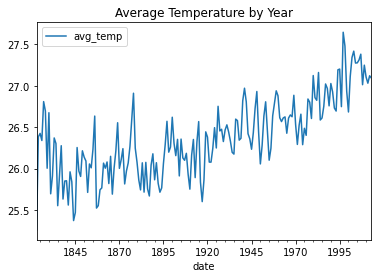

In [106]:
haiti[['avg_temp']].resample('Y').mean().plot()
plt.title('Average Temperature by Year')
plt.show()

### Convert Celsius to Fahrenheit
(for audience understanding)

In [111]:
haiti.avg_temp = (haiti.avg_temp * 9/5 +32)

In [112]:
haiti

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1823-01-01,74.2334,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1823-02-01,71.7224,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1823-03-01,74.9876,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1823-04-01,75.2774,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1823-05-01,78.6524,1.391,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...
2013-05-01,81.6728,0.309,Port Au Prince,Haiti,18.48N,72.68W
2013-06-01,82.8320,0.587,Port Au Prince,Haiti,18.48N,72.68W
2013-07-01,82.9346,1.444,Port Au Prince,Haiti,18.48N,72.68W


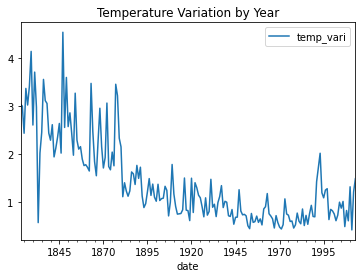

In [146]:
haiti[['temp_vari']].resample('Y').max().plot()
plt.title('Temperature Variation by Year')
plt.show()

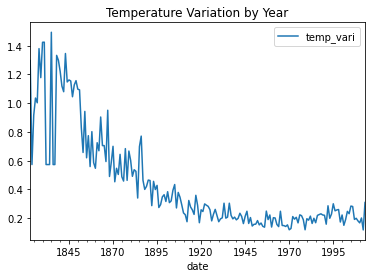

In [147]:
haiti[['temp_vari']].resample('Y').min().plot()
plt.title('Temperature Variation by Year')
plt.show()

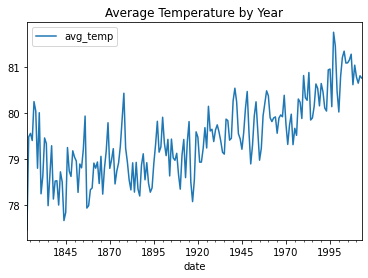

In [113]:
haiti[['avg_temp']].resample('Y').mean().plot()
plt.title('Average Temperature by Year')
plt.show()

In [152]:
haiti.city.value_counts()

Cap Haïtien       2289
Carrefour         2277
Delmas            2277
Pétionville       2277
Port Au Prince    2277
Name: city, dtype: int64

In [158]:
# Looking to se if there's differing variability between cities, I don't expect there to bo, but just in case

print(haiti.temp_vari[haiti.city == 'Cap Haïtien'].max())
print(haiti.temp_vari[haiti.city == 'Cap Haïtien'].min())
print('-')
print(haiti.temp_vari[haiti.city == 'Carrefour'].max())
print(haiti.temp_vari[haiti.city == 'Carrefour'].min())
print('-')
print(haiti.temp_vari[haiti.city == 'Delmas'].max())
print(haiti.temp_vari[haiti.city == 'Delmas'].min())
print('-')
print(haiti.temp_vari[haiti.city == 'Cap Haïtien'].max())
print(haiti.temp_vari[haiti.city == 'Cap Haïtien'].min())
print('-')
print(haiti.temp_vari[haiti.city == 'Port Au Prince'].max())
print(haiti.temp_vari[haiti.city == 'Port Au Prince'].min())

4.541
0.118
-
4.434
0.1369999999999999
-
4.434
0.1369999999999999
-
4.541
0.118
-
4.434
0.1369999999999999


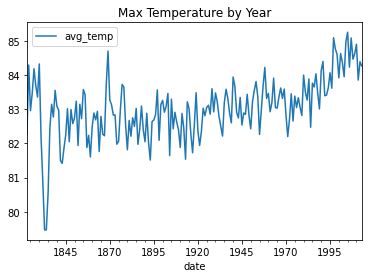

In [125]:
haiti[['avg_temp']].resample('Y').max().plot()
plt.title('Max Temperature by Year')
#plt.legend('Avg')
plt.show()

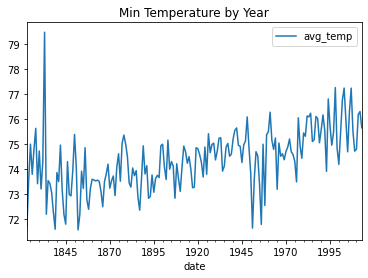

In [126]:
haiti[['avg_temp']].resample('Y').min().plot()
plt.title('Min Temperature by Year')
#plt.legend('Avg')
plt.show()

In [171]:
haiti[:2289]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1823-01-01,74.2334,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1823-02-01,71.7224,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1823-03-01,74.9876,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1823-04-01,75.2774,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1823-05-01,78.6524,1.391,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...
2013-05-01,80.7512,0.493,Cap Haïtien,Haiti,20.09N,71.66W
2013-06-01,82.5800,0.487,Cap Haïtien,Haiti,20.09N,71.66W
2013-07-01,82.6646,1.186,Cap Haïtien,Haiti,20.09N,71.66W


In [173]:
haiti[:12]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1823-01-01,74.2334,2.001,Cap Haïtien,Haiti,20.09N,71.66W
1823-02-01,71.7224,3.040,Cap Haïtien,Haiti,20.09N,71.66W
1823-03-01,74.9876,1.514,Cap Haïtien,Haiti,20.09N,71.66W
1823-04-01,75.2774,2.128,Cap Haïtien,Haiti,20.09N,71.66W
1823-05-01,78.6524,1.391,Cap Haïtien,Haiti,20.09N,71.66W
1823-06-01,81.5684,1.988,Cap Haïtien,Haiti,20.09N,71.66W
1823-07-01,82.2758,1.297,Cap Haïtien,Haiti,20.09N,71.66W
1823-08-01,81.1778,1.523,Cap Haïtien,Haiti,20.09N,71.66W
1823-09-01,79.8206,1.521,Cap Haïtien,Haiti,20.09N,71.66W


In [174]:
haiti[2289:2301]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,77.5850,1.265,Carrefour,Haiti,18.48N,72.68W
1824-02-01,75.9362,2.115,Carrefour,Haiti,18.48N,72.68W
1824-03-01,79.1024,2.247,Carrefour,Haiti,18.48N,72.68W
1824-04-01,78.6236,2.174,Carrefour,Haiti,18.48N,72.68W
1824-05-01,80.2490,1.584,Carrefour,Haiti,18.48N,72.68W
1824-06-01,79.4660,0.573,Carrefour,Haiti,18.48N,72.68W
1824-07-01,84.3008,2.894,Carrefour,Haiti,18.48N,72.68W
1824-08-01,81.7034,1.624,Carrefour,Haiti,18.48N,72.68W
1824-09-01,80.3120,1.589,Carrefour,Haiti,18.48N,72.68W


In [175]:
haiti[4566:4578]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,77.5850,1.265,Delmas,Haiti,18.48N,72.68W
1824-02-01,75.9362,2.115,Delmas,Haiti,18.48N,72.68W
1824-03-01,79.1024,2.247,Delmas,Haiti,18.48N,72.68W
1824-04-01,78.6236,2.174,Delmas,Haiti,18.48N,72.68W
1824-05-01,80.2490,1.584,Delmas,Haiti,18.48N,72.68W
1824-06-01,79.4660,0.573,Delmas,Haiti,18.48N,72.68W
1824-07-01,84.3008,2.894,Delmas,Haiti,18.48N,72.68W
1824-08-01,81.7034,1.624,Delmas,Haiti,18.48N,72.68W
1824-09-01,80.3120,1.589,Delmas,Haiti,18.48N,72.68W


In [176]:
haiti[6843:6855]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,77.5850,1.265,Pétionville,Haiti,18.48N,72.68W
1824-02-01,75.9362,2.115,Pétionville,Haiti,18.48N,72.68W
1824-03-01,79.1024,2.247,Pétionville,Haiti,18.48N,72.68W
1824-04-01,78.6236,2.174,Pétionville,Haiti,18.48N,72.68W
1824-05-01,80.2490,1.584,Pétionville,Haiti,18.48N,72.68W
1824-06-01,79.4660,0.573,Pétionville,Haiti,18.48N,72.68W
1824-07-01,84.3008,2.894,Pétionville,Haiti,18.48N,72.68W
1824-08-01,81.7034,1.624,Pétionville,Haiti,18.48N,72.68W
1824-09-01,80.3120,1.589,Pétionville,Haiti,18.48N,72.68W


In [181]:
haiti[9120:9132]

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,77.5850,1.265,Port Au Prince,Haiti,18.48N,72.68W
1824-02-01,75.9362,2.115,Port Au Prince,Haiti,18.48N,72.68W
1824-03-01,79.1024,2.247,Port Au Prince,Haiti,18.48N,72.68W
1824-04-01,78.6236,2.174,Port Au Prince,Haiti,18.48N,72.68W
1824-05-01,80.2490,1.584,Port Au Prince,Haiti,18.48N,72.68W
1824-06-01,79.4660,0.573,Port Au Prince,Haiti,18.48N,72.68W
1824-07-01,84.3008,2.894,Port Au Prince,Haiti,18.48N,72.68W
1824-08-01,81.7034,1.624,Port Au Prince,Haiti,18.48N,72.68W
1824-09-01,80.3120,1.589,Port Au Prince,Haiti,18.48N,72.68W


### Drop the first 12 rows 

In [182]:
haiti = haiti[12:]
haiti

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,75.9164,1.254,Cap Haïtien,Haiti,20.09N,71.66W
1824-02-01,73.6142,2.152,Cap Haïtien,Haiti,20.09N,71.66W
1824-03-01,76.6040,2.373,Cap Haïtien,Haiti,20.09N,71.66W
1824-04-01,76.7606,2.266,Cap Haïtien,Haiti,20.09N,71.66W
1824-05-01,79.5740,1.633,Cap Haïtien,Haiti,20.09N,71.66W
...,...,...,...,...,...,...
2013-05-01,81.6728,0.309,Port Au Prince,Haiti,18.48N,72.68W
2013-06-01,82.8320,0.587,Port Au Prince,Haiti,18.48N,72.68W
2013-07-01,82.9346,1.444,Port Au Prince,Haiti,18.48N,72.68W


## The dataframe has 5 sets of city data over 189 years

### Separate by City
    - Focus on Port Au Prince

In [202]:
ch = haiti[:2277]
carre = haiti[2277:4554]
delmas = haiti[4554:6831]
pet = haiti[6831:9108]
cap = haiti[9108:]
cap

,avg_temp,temp_vari,city,country,lat,long
date,,,,,,
1824-01-01,77.5850,1.265,Port Au Prince,Haiti,18.48N,72.68W
1824-02-01,75.9362,2.115,Port Au Prince,Haiti,18.48N,72.68W
1824-03-01,79.1024,2.247,Port Au Prince,Haiti,18.48N,72.68W
1824-04-01,78.6236,2.174,Port Au Prince,Haiti,18.48N,72.68W
1824-05-01,80.2490,1.584,Port Au Prince,Haiti,18.48N,72.68W
...,...,...,...,...,...,...
2013-05-01,81.6728,0.309,Port Au Prince,Haiti,18.48N,72.68W
2013-06-01,82.8320,0.587,Port Au Prince,Haiti,18.48N,72.68W
2013-07-01,82.9346,1.444,Port Au Prince,Haiti,18.48N,72.68W


#### In meteorology, diurnal temperature variation is the variation between a high air temperature and a low temperature that occurs during the same day.

#### This variation in daily temperatures for a specific location is influenced by the angle of the sun's rays and the number of daylight hours at that location. Both the angle of the sun's rays and the number of daylight hours in a location change throughout the year as Earth orbits or revolves around the sun.

---

In [227]:
cap.resample('Y')[['avg_temp']].mean()

,avg_temp
date,
1824-12-31,79.59035
1825-12-31,79.71335
1826-12-31,79.56200
1827-12-31,80.42030
1828-12-31,80.16260
...,...
2009-12-31,81.23060
2010-12-31,80.93945
2011-12-31,80.78000


<AxesSubplot:xlabel='date'>

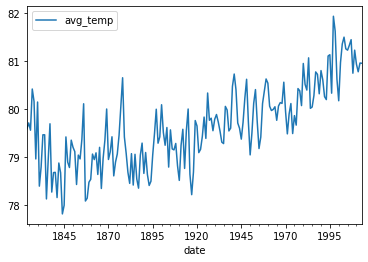

In [230]:
cap.resample('Y')[['avg_temp']].mean().plot()#.isnull().sum()

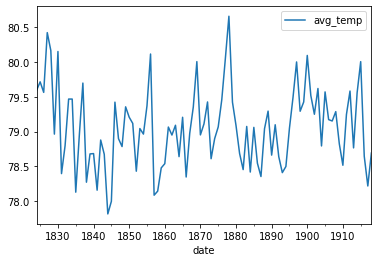

In [233]:
cap.resample('Y')[['avg_temp']].mean()[:95].plot()
plt.show()

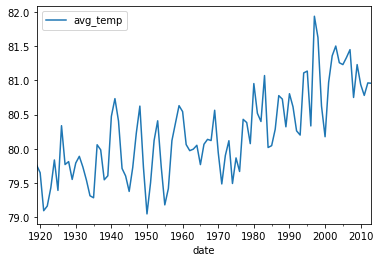

In [232]:
cap.resample('Y')[['avg_temp']].mean()[95:].plot()
plt.show()

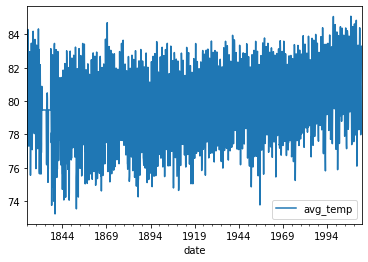

In [235]:
cap.resample('M')[['avg_temp']].mean().plot()
plt.show()

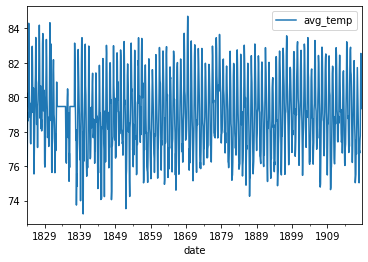

In [236]:
cap.resample('M')[['avg_temp']].mean()[:1138].plot()
plt.show()

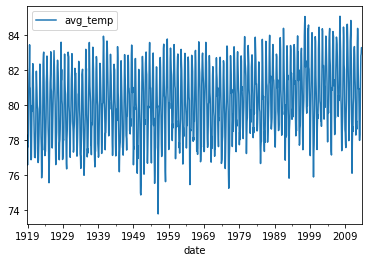

In [237]:
cap.resample('M')[['avg_temp']].mean()[1138:].plot()
plt.show()

In [204]:
hm = cap.resample('M')[['avg_temp']].mean()#.isnull().sum()
hm

,avg_temp
date,
1824-01-31,77.5850
1824-02-29,75.9362
1824-03-31,79.1024
1824-04-30,78.6236
1824-05-31,80.2490
...,...
2013-05-31,81.6728
2013-06-30,82.8320
2013-07-31,82.9346


In [205]:
int(len(hm) * 0.5)
train_size = int(len(hm) * 0.5)
train_size

1138

In [206]:
validate_size = int(len(hm) * 0.3)
validate_size

683

In [207]:
test_size = int(len(hm) - train_size - validate_size)
test_size

456

In [208]:
len(hm) == train_size + validate_size + test_size

True

In [210]:
validate_end_index = train_size + validate_size
validate_end_index

1821

In [214]:
train = hm[:train_size]
validate = hm[train_size:validate_end_index]
test = hm[validate_end_index:]

In [215]:
train.size, validate.size, test.size

(1138, 683, 456)

In [216]:
train

,avg_temp
date,
1824-01-31,77.5850
1824-02-29,75.9362
1824-03-31,79.1024
1824-04-30,78.6236
1824-05-31,80.2490
...,...
1918-06-30,80.1140
1918-07-31,82.5494
1918-08-31,81.9068


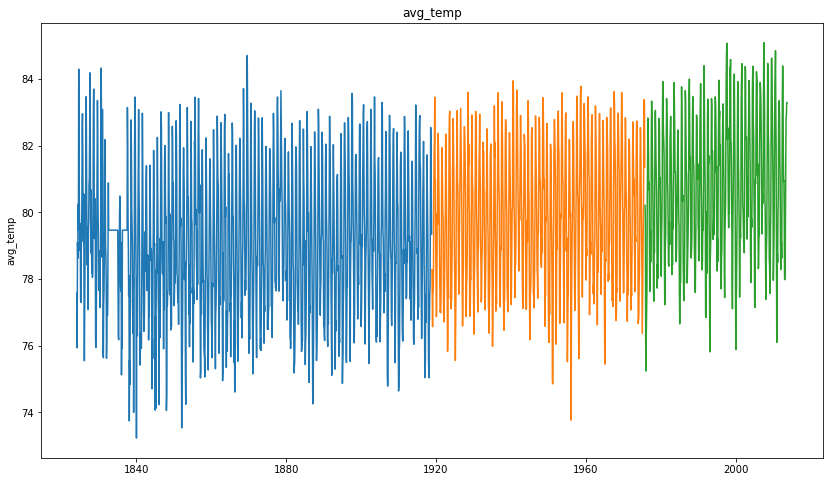

In [217]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()